In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import timetable_scheduler


In [22]:
timetable_scheduler.create_dataset(term_id=3, lecturer_p=0.8, room_p=0.6)
setup = timetable_scheduler.StatisticalTestsAlgorithmSetup(
    cooling_schedule=timetable_scheduler.simulated_annealing.exponential_cooling_schedule, Tmax=100, kmax=3, alpha=0.99)
results = setup.SA()

zresetowałem początkowe rozwiązanie 0-razy
2554.0
100
97.0299
94.1480149401
91.35172474836408
88.63848717161292
86.00583546412885
83.45137614500875
80.97278682212584
78.56781408072187
76.23427143471035
73.97003733882802
71.77305325982749
69.64132180495734
67.57290490602831
65.56592205741435
63.618548606387094
61.729014094228795
59.895600646616096
58.11664141181095
56.390519045238754
54.71566423907612
53.09055429551132
51.51371174238033
49.98370298991989
48.49913702741628
47.05866415856499
45.66097477439145
44.304798162617246
42.988901352389355
41.71208799332204
40.473197267832376
39.27110283578049
38.104711810454965
36.97296376497265
35.874829768189194
34.8093114492442
33.7754400898902
32.77227574378037
31.79890638191435
30.854447063465106
29.93803913123313
29.048849430996377
28.18606955404635
27.34891510222162
26.536624974770533
25.748460676394874
24.98370564584527
24.24166460445802
23.521662924041014
22.823046013534068
22.14517872388609
21.48744477060795
20.849246173476125
20.2300027

In [23]:
operator_data = list(setup.operator_quality_measurement.values())


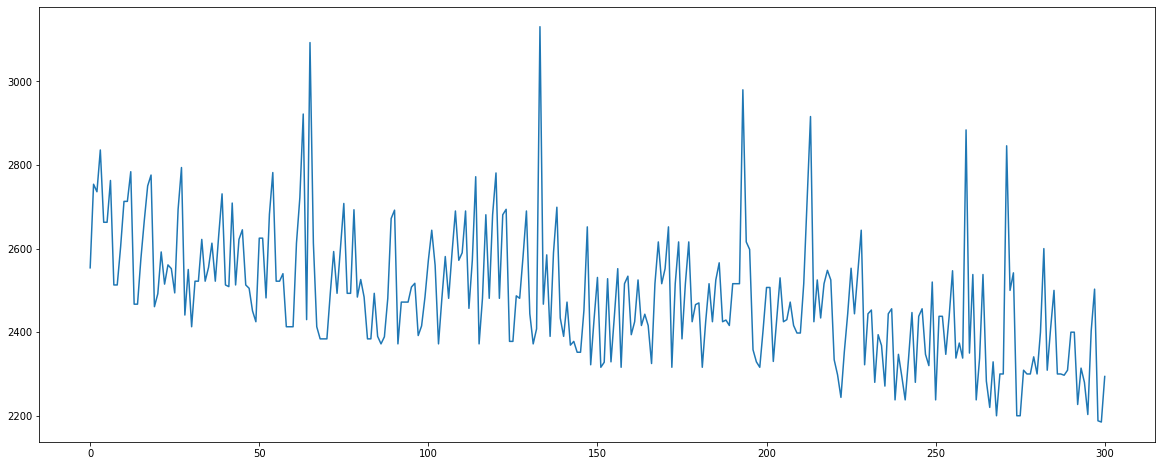

In [24]:
plt.figure(figsize=(20, 8))
plt.plot(setup.f_costs)

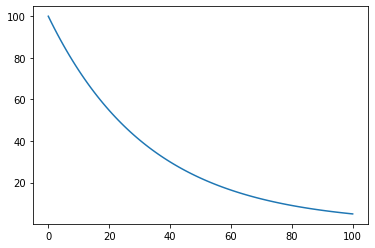

In [25]:
plt.plot(setup.temperatures)

In [26]:
for operator in operator_data:
    print(operator.operator_name)
    print(operator.n_acceptable_solutions)
    print(operator.f_cost_improvements)

matrix_transposition
92
0
matrix_inner_translation
100
2
matrix_cut_and_paste_translation
108
32


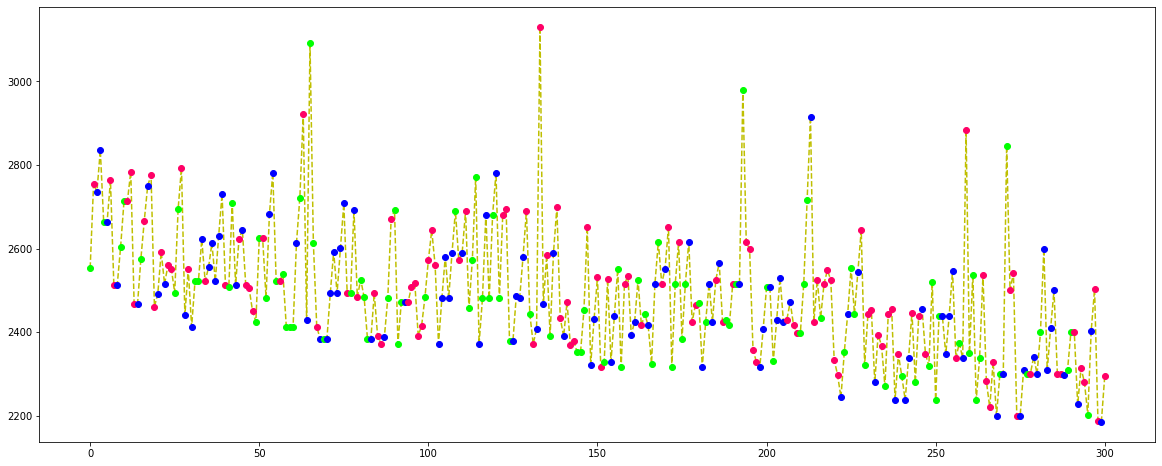

In [27]:
import pandas as pd
transposition_iterations, transposition_f_costs = operator_data[0].get_f_cost_data()
translation_iterations, translation_f_costs = operator_data[1].get_f_cost_data()
cut_and_paste_iterations, cut_and_paste_f_costs = operator_data[2].get_f_cost_data()

def map_to_operator(iter_num):
    if iter_num in translation_iterations:
        return "#0000FF"
    elif iter_num in transposition_iterations:
        return "#00FF00"
    else:
        return "#FF0066"

plt.figure(figsize=(20, 8))
for i, f_cost in enumerate(setup.f_costs):
    plt.scatter(i, f_cost, c=map_to_operator(i))
plt.plot(setup.f_costs, 'y--', zorder=0)

<AxesSubplot:xlabel='operator', ylabel='f_cost'>

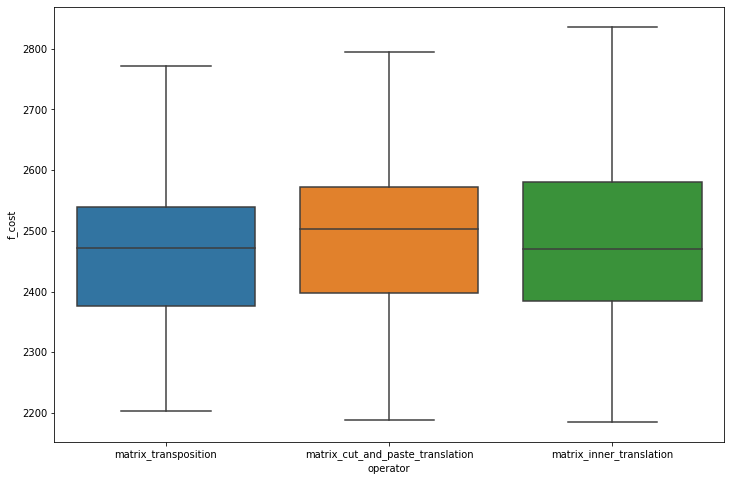

In [28]:
df = pd.DataFrame(setup.f_costs)
df.reset_index(inplace=True)
df.columns = ['iteration', 'f_cost']

def map_to_operator(iter_num):
    if iter_num in translation_iterations:
        return operator_data[1].operator_name
    elif iter_num in transposition_iterations:
        return operator_data[0].operator_name
    else:
        return operator_data[2].operator_name

df['operator'] = df['iteration'].apply(lambda x: map_to_operator(x))
plt.figure(figsize=(12, 8))
sns.boxplot(x='operator', y='f_cost', data=df, showfliers=False)

<AxesSubplot:xlabel='operator', ylabel='f_cost_change'>

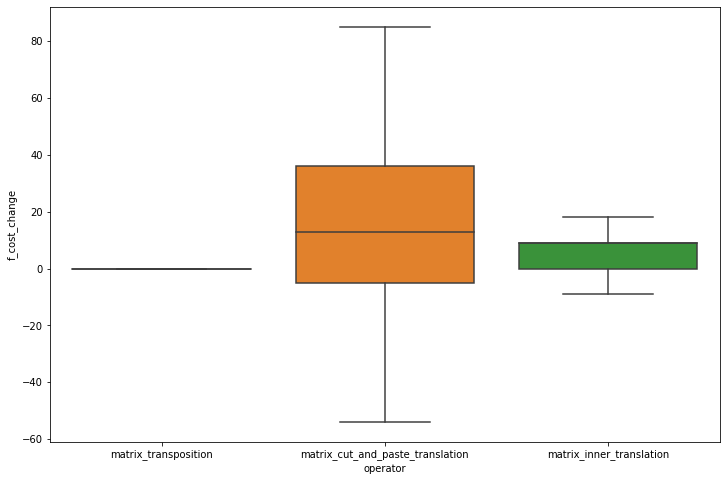

In [29]:
transposition_iterations, transposition_f_costs = operator_data[0].get_f_cost_change_data()
translation_iterations, translation_f_costs = operator_data[1].get_f_cost_change_data()
cut_and_paste_iterations, cut_and_paste_f_costs = operator_data[2].get_f_cost_change_data()

a = lambda x: {i: v for i, v in zip(transposition_iterations, transposition_f_costs)}[x]
b = lambda x: {i: v for i, v in zip(translation_iterations, translation_f_costs)}[x]
c = lambda x: {i: v for i, v in zip(cut_and_paste_iterations, cut_and_paste_f_costs)}[x]

def xd(iter_num):
    if iter_num in translation_iterations:
        return b(iter_num)
    elif iter_num in transposition_iterations:
        return a(iter_num)
    elif iter_num in cut_and_paste_iterations:
        return c(iter_num)
    else:
        return 999  # xd

df = pd.DataFrame([xd(i) for i in range(len(setup.f_costs))])
df.reset_index(inplace=True)
df.columns = ['iteration', 'f_cost_change']


df['operator'] = df['iteration'].apply(lambda x: map_to_operator(x))
plt.figure(figsize=(12, 8))
sns.boxplot(x='operator', y='f_cost_change', data=df, showfliers=False)

In [30]:
df

,iteration,f_cost_change,operator
0,0,0.0,matrix_transposition
1,1,-18.0,matrix_cut_and_paste_translation
2,2,0.0,matrix_inner_translation
3,3,9.0,matrix_inner_translation
4,4,0.0,matrix_transposition
...,...,...,...
296,296,0.0,matrix_inner_translation
297,297,-12.0,matrix_cut_and_paste_translation
298,298,-3.0,matrix_cut_and_paste_translation
299,299,9.0,matrix_inner_translation
